In [1]:
import numpy as np
import os
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import tensorflow.keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [2]:
actions = ['left', 'nomove', 'right', 'shoot']
action_label = {actions:i for i, actions in enumerate(actions)}
IMAGE_SIZE = (224, 224)

In [4]:
output_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/Game2/Screenshots27k/Screenshots"

#model_path = "/content/drive/MyDrive"

## First, RGB images

In [82]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="training",
                                                                                           shuffle=True,
                                                                                           seed = 62345)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="validation",
                                                                                           shuffle=True,
                                                                                           seed = 12532)

Found 27437 files belonging to 4 classes.
Using 21950 files for training.
Found 27437 files belonging to 4 classes.
Using 5487 files for validation.


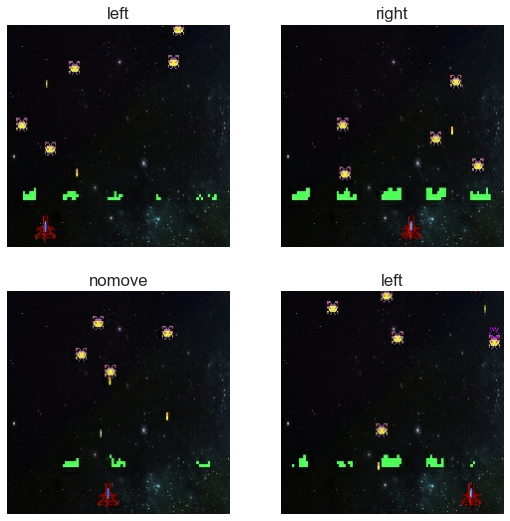

In [85]:
plt.figure(figsize=(9, 9))
class_names = training_dataset.class_names
for images, labels in training_dataset.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [6]:
num_images_per_class = []

for label in training_dataset.class_names:
    dir_name = output_folder + '/' +label
    num_images_per_class.append(len([name for name in os.listdir(dir_name)]))
num_images_per_class

[7755, 7586, 7607, 4489]

In [84]:
training_dataset.class_names

['left', 'nomove', 'right', 'shoot']

In [ ]:
sum = np.sum(num_images_per_class)
weights = []
for i in num_images_per_class:
  weights.append(1.17-i/sum)
weights

[0.88735248022743, 0.8935120457775996, 0.8927466559755075, 1.0063888180194627]

In [8]:
training_dataset = training_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [9]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [10]:
cb = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]

<function matplotlib.pyplot.show(close=None, block=None)>

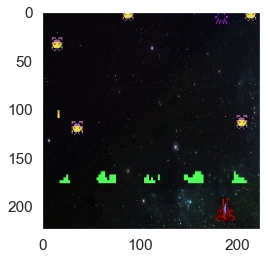

In [35]:
plt.imshow(cv2.cvtColor(cv2.imread('C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/Game2/Screenshots27k/Screenshots/left/screenshotABBKQB.jpg'), cv2.COLOR_BGR2RGB))
plt.grid(0)
plt.show
# cv2 reads images in BGR format, so we convert to RGB then display with plt.imshow()

## ---------------------

In [19]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.build((None, 224, 224, 3))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 3)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 37632)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4817024   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,825,540
Trainable params: 4,825,540
Non-trainable params: 0
____________________________________________

In [36]:
history = model.fit(training_dataset, epochs=100, validation_data=validation_dataset, callbacks=cb, class_weight={0: 1, 1: 1, 2: 1, 3: 1})

Epoch 1/100
686/686 [==============================] - 24s 34ms/step - loss: 1.3689 - accuracy: 0.2750 - val_loss: 1.3656 - val_accuracy: 0.2812
Epoch 2/100
686/686 [==============================] - 24s 35ms/step - loss: 1.3687 - accuracy: 0.2765 - val_loss: 1.3637 - val_accuracy: 0.2805
Epoch 3/100
686/686 [==============================] - 25s 36ms/step - loss: 1.3688 - accuracy: 0.2778 - val_loss: 1.3655 - val_accuracy: 0.2812
Epoch 4/100
686/686 [==============================] - 25s 37ms/step - loss: 1.3686 - accuracy: 0.2791 - val_loss: 1.3640 - val_accuracy: 0.2805
Epoch 5/100
686/686 [==============================] - 26s 38ms/step - loss: 1.3698 - accuracy: 0.2740 - val_loss: 1.3649 - val_accuracy: 0.2805
Epoch 6/100
686/686 [==============================] - 26s 38ms/step - loss: 1.3690 - accuracy: 0.2732 - val_loss: 1.3644 - val_accuracy: 0.2812
Epoch 7/100
686/686 [==============================] - 24s 36ms/step - loss: 1.3691 - accuracy: 0.2728 - val_loss: 1.3652 - val_ac

In [37]:
labels = []
predictions = []
for x,y in validation_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())
# verbose = 0 disables progress bar prints

In [38]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

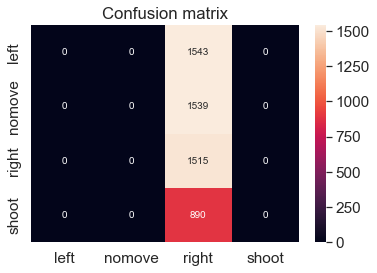

In [39]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in labels], predictions)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

## Larger strides

In [46]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2),strides=(3,3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.build((None, 224, 224, 3))

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 3)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16875)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               2160128   
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,168,644
Trainable params: 2,168,644
Non-trainable params: 0
____________________________________________

In [49]:
history = model.fit(training_dataset, epochs=100, validation_data=validation_dataset, callbacks=cb, class_weight={0: 1, 1: 1, 2: 1, 3: 1})

Epoch 1/100
686/686 [==============================] - 17s 25ms/step - loss: 447.6375 - accuracy: 0.2765 - val_loss: 1.3685 - val_accuracy: 0.2805
Epoch 2/100
686/686 [==============================] - 17s 25ms/step - loss: 1.3697 - accuracy: 0.2779 - val_loss: 1.3669 - val_accuracy: 0.2805
Epoch 3/100
686/686 [==============================] - 17s 25ms/step - loss: 1.3701 - accuracy: 0.2758 - val_loss: 1.3656 - val_accuracy: 0.2805
Epoch 4/100
686/686 [==============================] - 18s 26ms/step - loss: 1.3697 - accuracy: 0.2768 - val_loss: 1.3658 - val_accuracy: 0.2812
Epoch 5/100
686/686 [==============================] - 17s 25ms/step - loss: 1.3693 - accuracy: 0.2770 - val_loss: 1.3652 - val_accuracy: 0.2805
Epoch 6/100
686/686 [==============================] - 17s 25ms/step - loss: 1.3690 - accuracy: 0.2754 - val_loss: 1.3682 - val_accuracy: 0.2805
Epoch 7/100
686/686 [==============================] - 17s 25ms/step - loss: 1.3691 - accuracy: 0.2769 - val_loss: 1.3650 - val_

In [50]:
labels = []
predictions = []
for x,y in validation_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())
# verbose = 0 disables progress bar prints

In [51]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

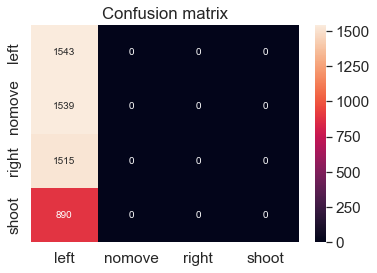

In [52]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in labels], predictions)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

## Grayscale

In [70]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="training",
                                                                                           color_mode='grayscale',
                                                                                           shuffle=True,
                                                                                           seed = 62345)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="validation",
                                                                                           color_mode='grayscale',
                                                                                           shuffle=True,
                                                                                           seed = 12532)

Found 27437 files belonging to 4 classes.
Using 21950 files for training.
Found 27437 files belonging to 4 classes.
Using 5487 files for validation.


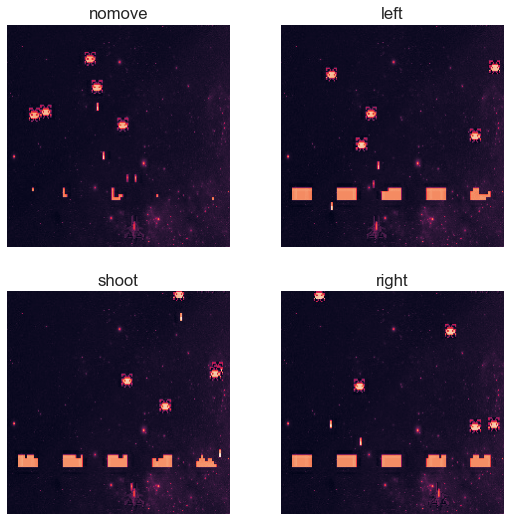

In [81]:
plt.figure(figsize=(9, 9))
class_names = training_dataset.class_names
for images, labels in training_dataset.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [54]:
num_images_per_class = []

for label in training_dataset.class_names:
    dir_name = output_folder + '/' +label
    num_images_per_class.append(len([name for name in os.listdir(dir_name)]))
num_images_per_class

[7755, 7586, 7607, 4489]

In [55]:
training_dataset.class_names

['left', 'nomove', 'right', 'shoot']

In [56]:
training_dataset = training_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [57]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.build((None, 224, 224, 1))

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 1)      0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               1605760   
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1,614,276
Trainable params: 1,614,276
Non-trainable params: 0
____________________________________________

In [60]:
history = model.fit(training_dataset, epochs=100, validation_data=validation_dataset, callbacks=cb, class_weight={0: 1, 1: 1, 2: 1, 3: 1})

Epoch 1/100
686/686 [==============================] - 15s 21ms/step - loss: 217.0182 - accuracy: 0.2759 - val_loss: 1.3637 - val_accuracy: 0.2812
Epoch 2/100
686/686 [==============================] - 14s 21ms/step - loss: 1.3688 - accuracy: 0.2755 - val_loss: 1.3639 - val_accuracy: 0.2812
Epoch 3/100
686/686 [==============================] - 13s 20ms/step - loss: 1.3683 - accuracy: 0.2755 - val_loss: 1.3647 - val_accuracy: 0.2805
Epoch 4/100
686/686 [==============================] - 14s 20ms/step - loss: 1.3684 - accuracy: 0.2783 - val_loss: 1.3644 - val_accuracy: 0.2812
Epoch 5/100
686/686 [==============================] - 14s 21ms/step - loss: 1.3688 - accuracy: 0.2747 - val_loss: 1.3670 - val_accuracy: 0.2812
Epoch 6/100
686/686 [==============================] - 14s 21ms/step - loss: 1.3693 - accuracy: 0.2730 - val_loss: 1.3645 - val_accuracy: 0.2805


In [61]:
labels = []
predictions = []
for x,y in validation_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())
# verbose = 0 disables progress bar prints

In [62]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

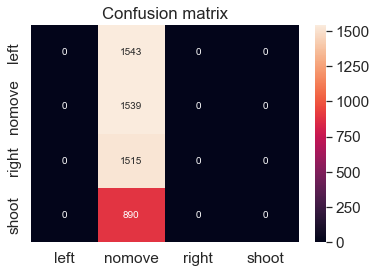

In [63]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in labels], predictions)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()